### P.S -> To predict whether the passenger is survived or not

### 1. Import packages

In [1]:
## Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 2.Load the Dataset

In [3]:
## Load the dataset
df=pd.read_csv("titanic-training-data.csv")

### 3.Analyze the dataset like shape,datatypes,missing values,describe etc..

In [4]:
df.shape

(891, 12)

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

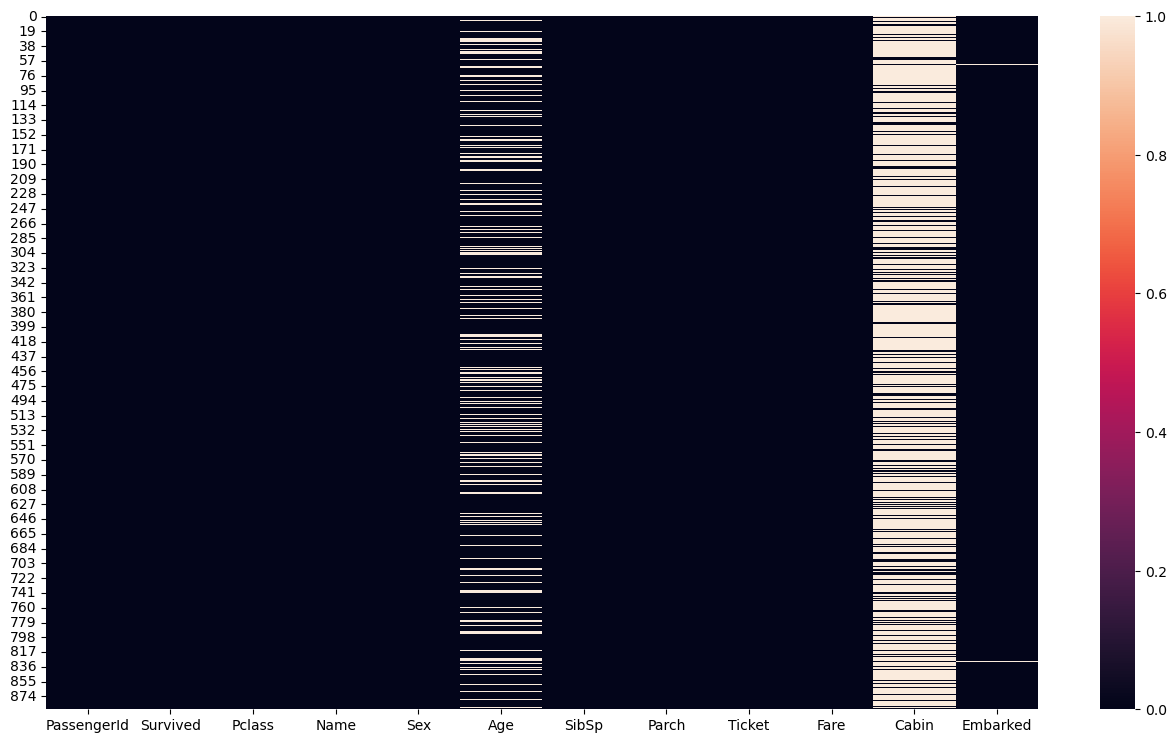

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

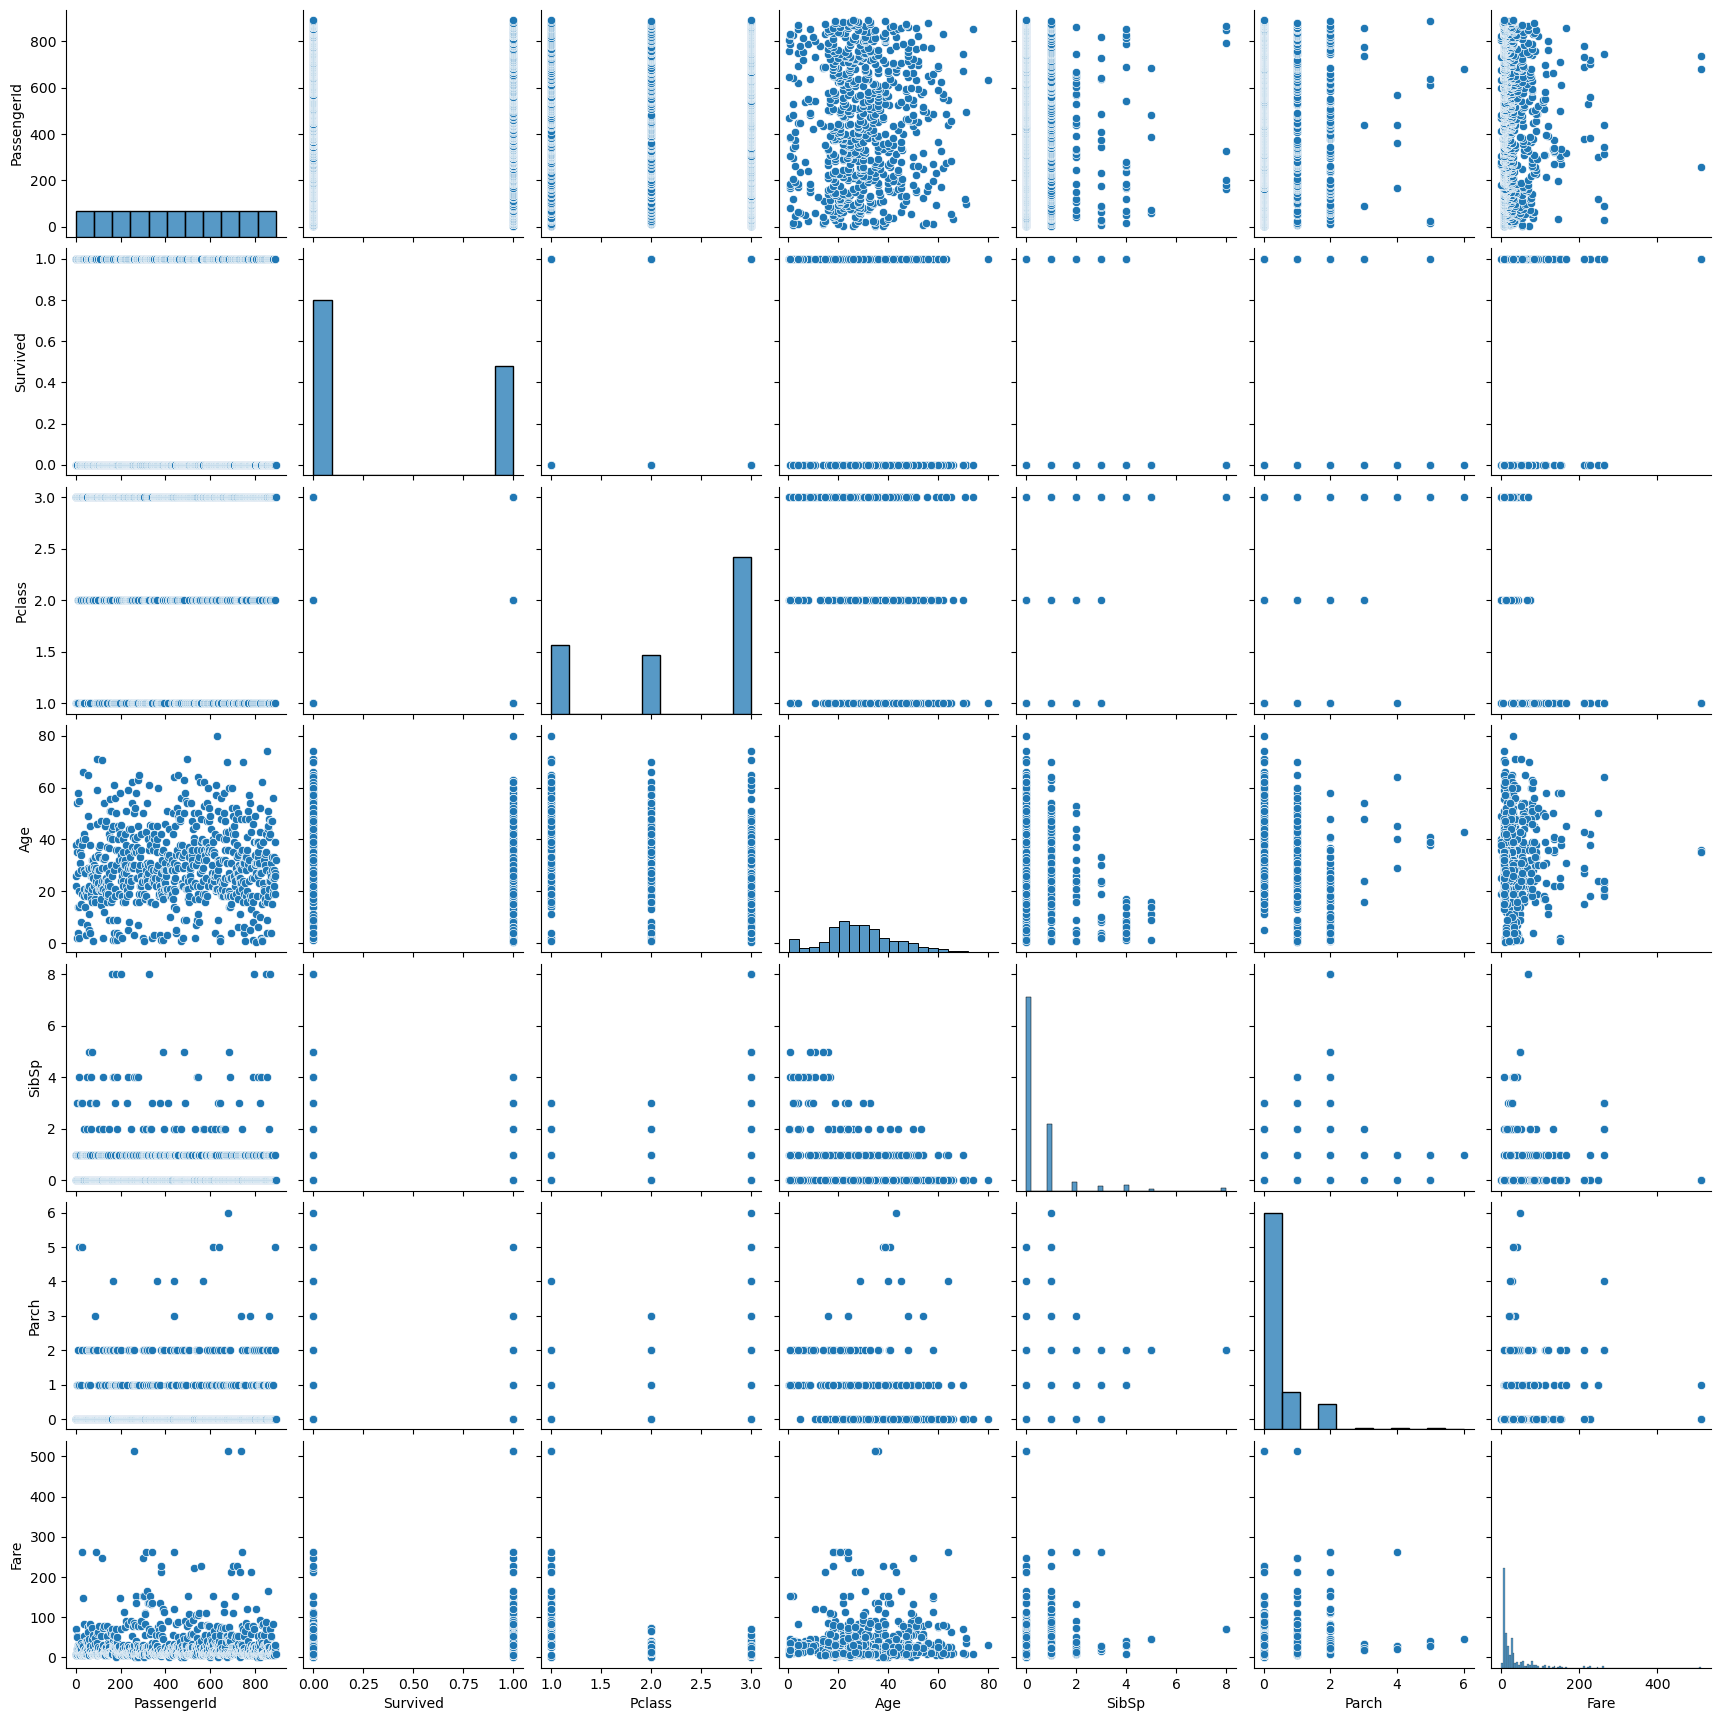

In [10]:
sns.pairplot(df)

### 4.Show the distribution of survived and not survived

<Axes: xlabel='Survived', ylabel='count'>

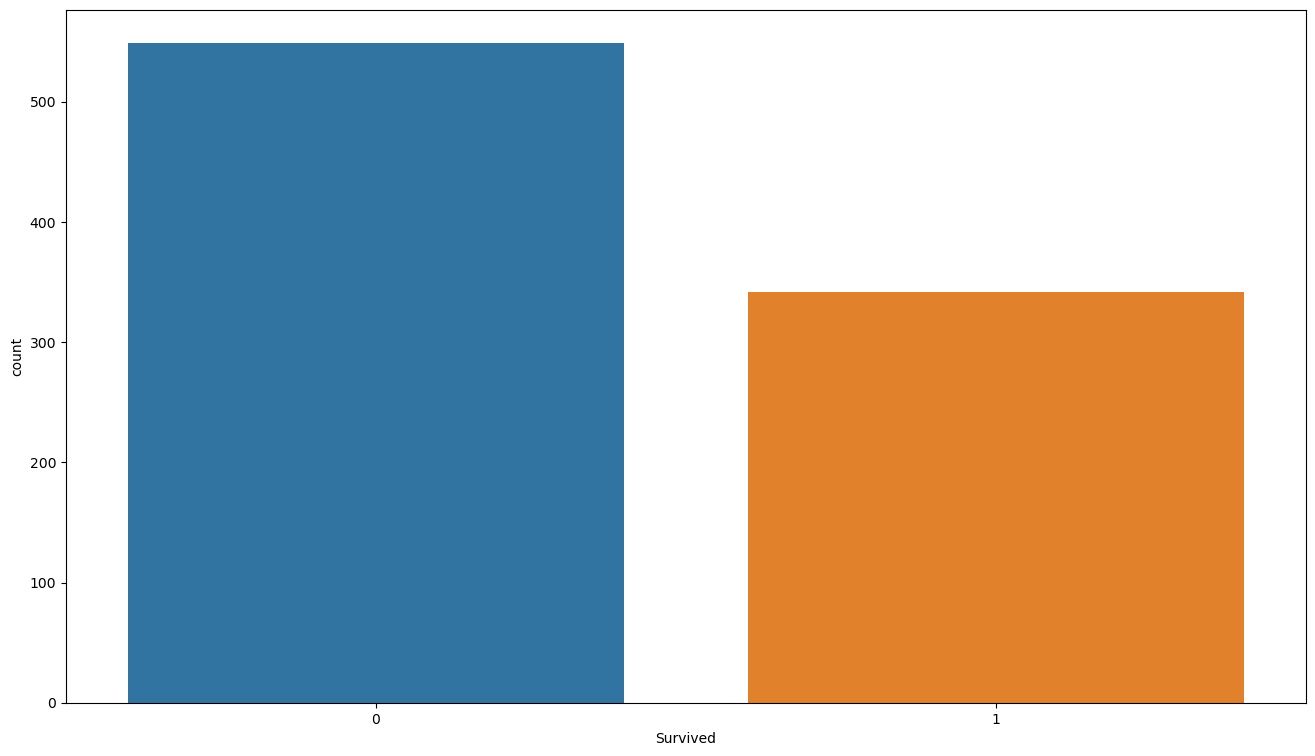

In [11]:
plt.figure(figsize=(16,9))
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Survived', ylabel='count'>

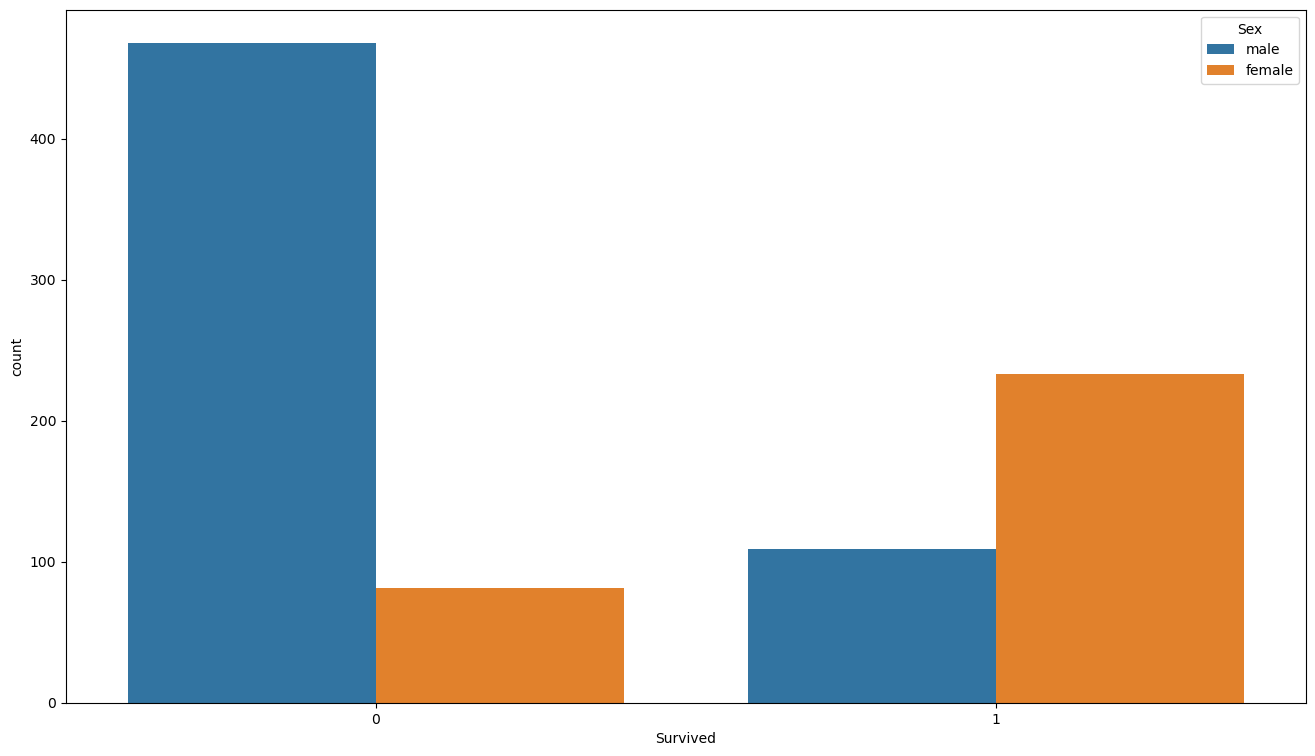

In [12]:
plt.figure(figsize=(16,9))
sns.countplot(x="Survived",hue="Sex",data=df)

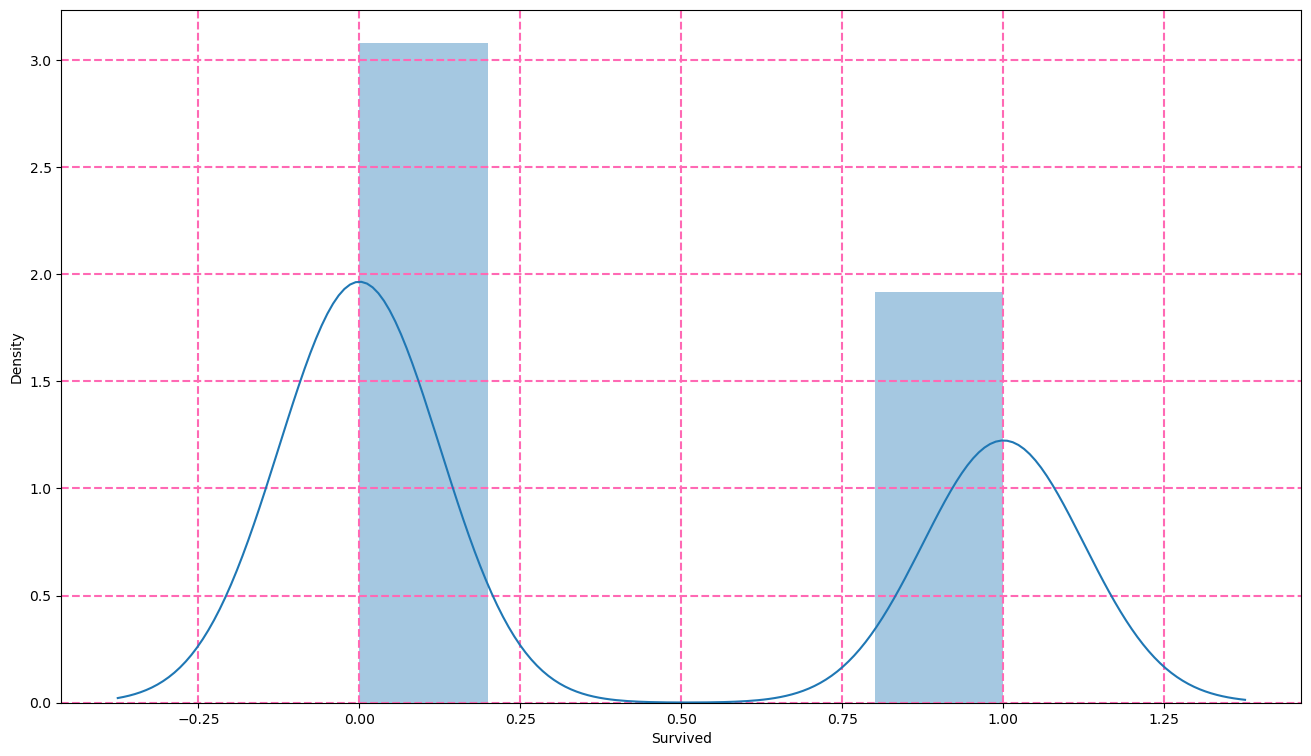

In [13]:
plt.figure(figsize=(16,9))
sns.distplot(df["Survived"])
plt.grid(color = 'hotpink', linestyle = '--', linewidth = 1.5)
plt.show()

 ### 5.Show the distribution across pclass

<Axes: xlabel='Pclass', ylabel='count'>

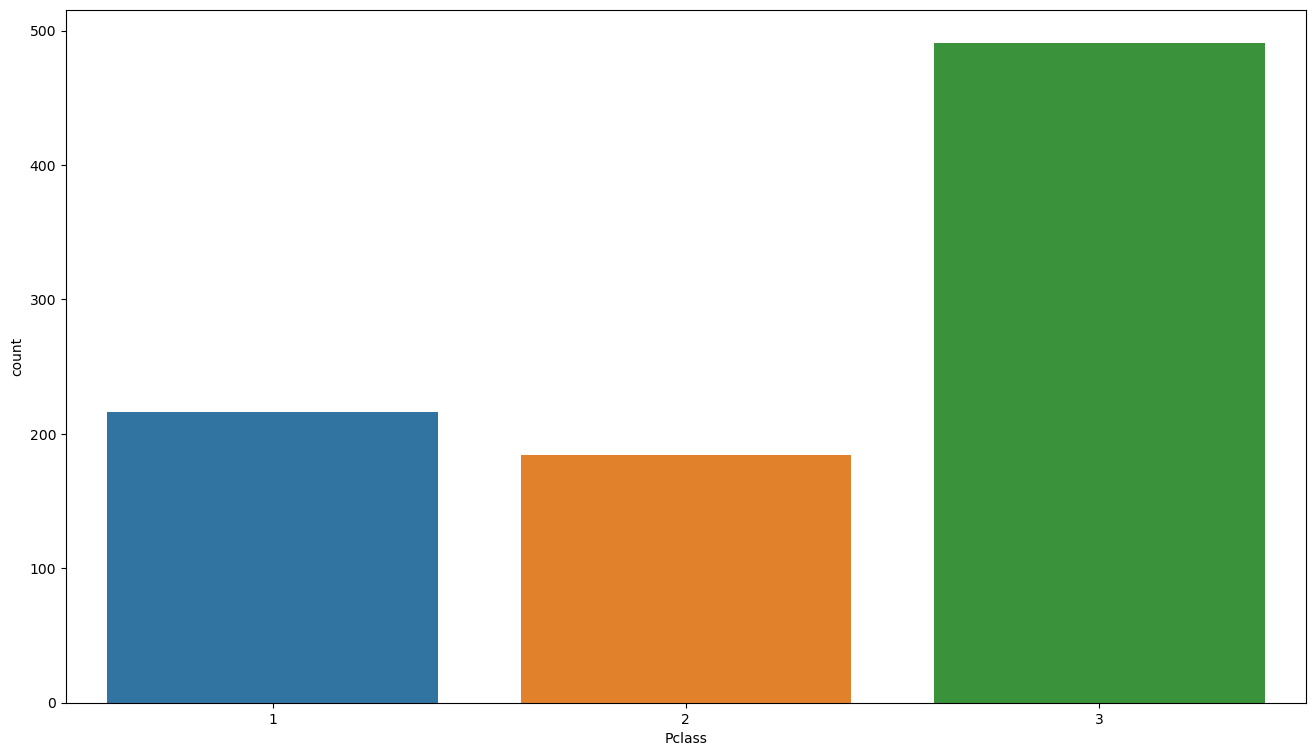

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(x="Pclass",data=df)

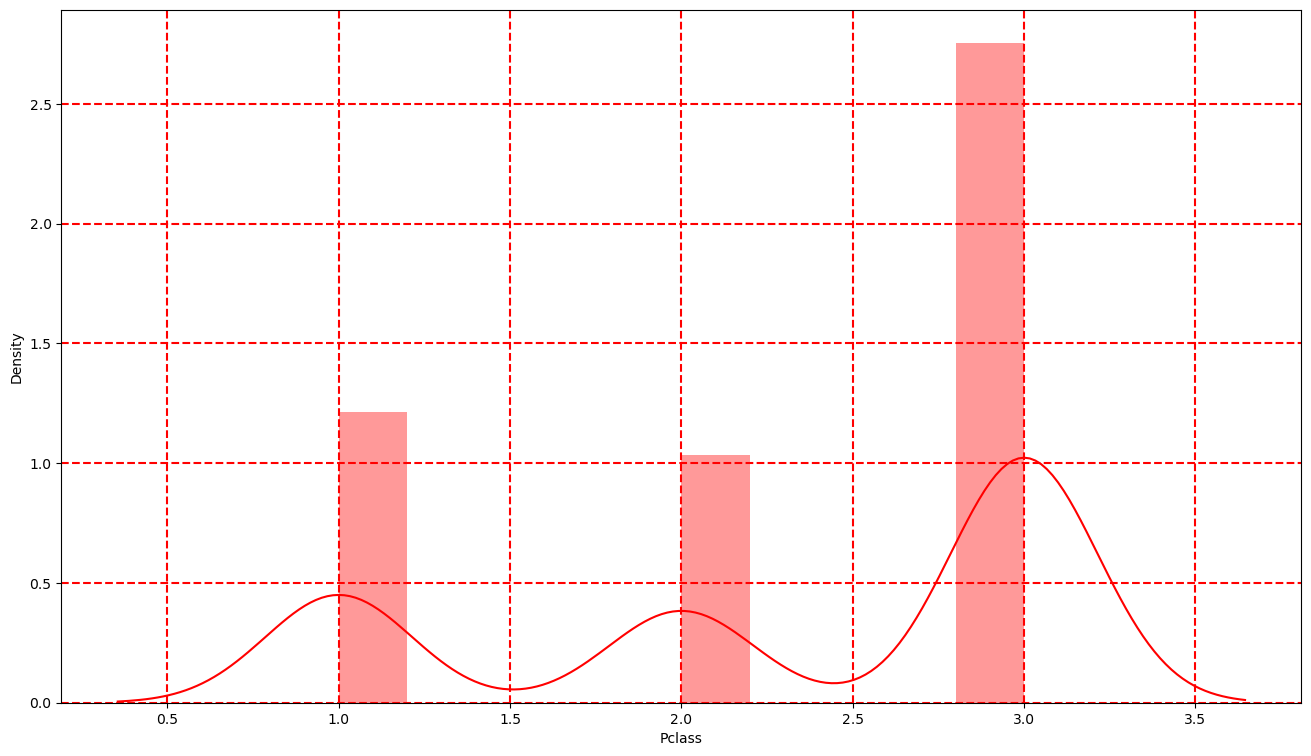

In [15]:
plt.figure(figsize=(16,9))
sns.distplot(df["Pclass"],color="red")
plt.grid(color = 'red', linestyle = '--', linewidth = 1.5)
plt.show()

 ### 6. Show the distribution of Embarked

<Axes: xlabel='Embarked', ylabel='count'>

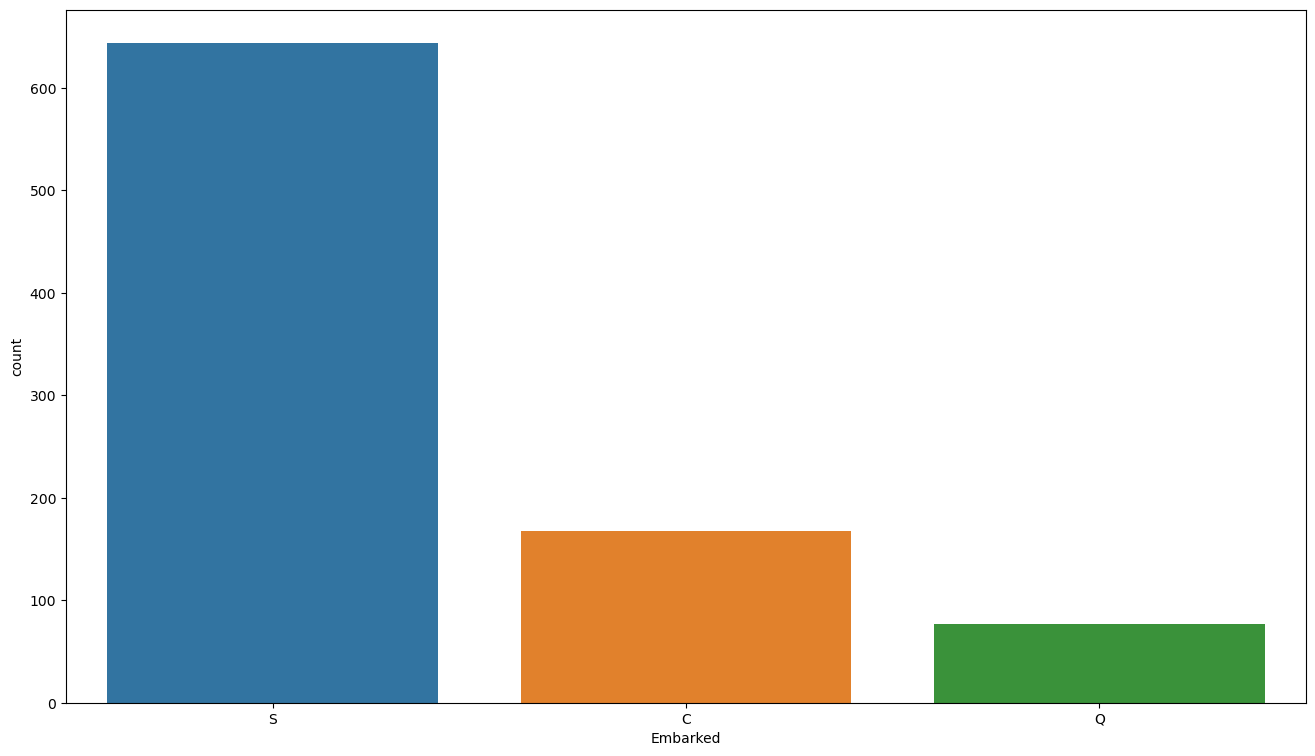

In [16]:
plt.figure(figsize=(16,9))
sns.countplot(x="Embarked",data=df)

### 7. Show the distribution of Age

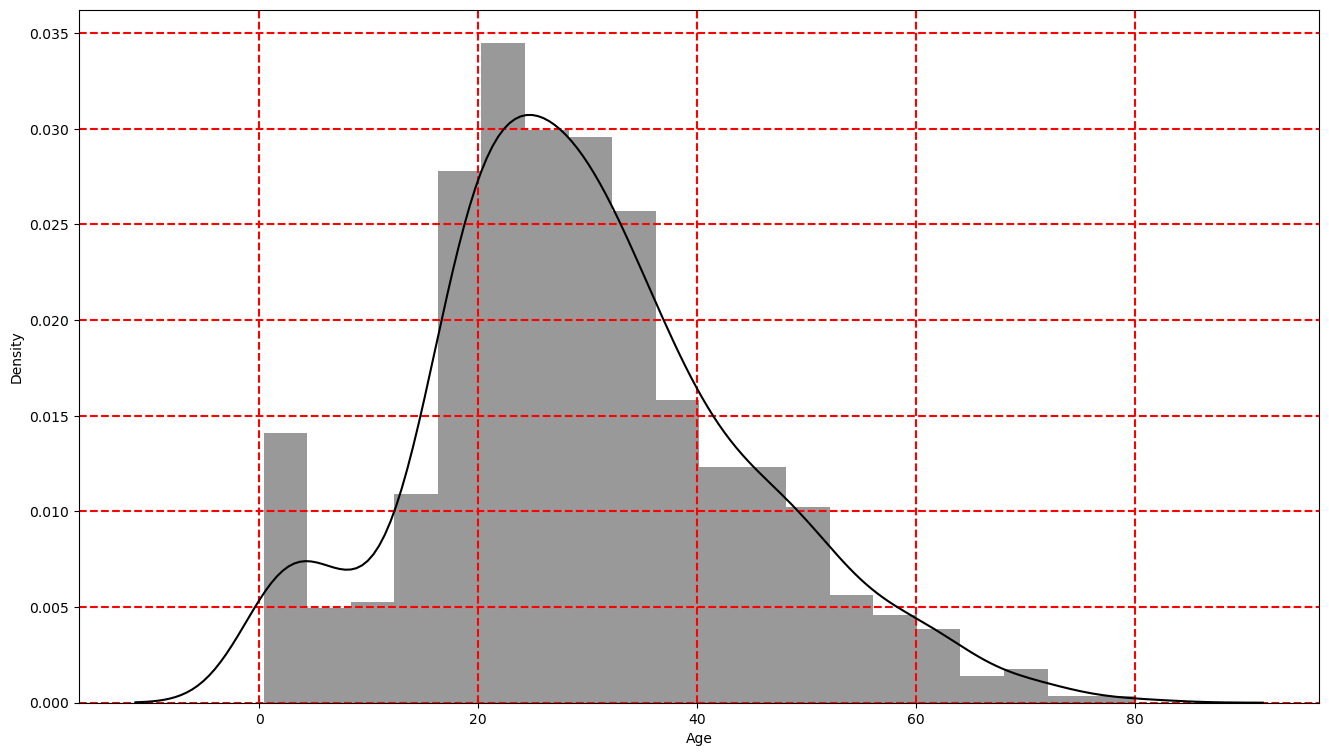

In [17]:
plt.figure(figsize=(16,9))
sns.distplot(df["Age"],color="black")
plt.grid(color = 'red', linestyle = '--', linewidth = 1.5)
plt.show()

### 8. Check whether there are outliers in Age

In [18]:
# step-1-Finding the IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


17.875


In [19]:
# step-2-Finding the upper and lower limits for outliers
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

64.8125
-6.6875


In [20]:
# Finding  the upper outliers
upper_outlier=df[df['Age'] > upper_limit]
print(upper_outlier)


     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

In [21]:
lower_outlier=df[df['Age'] < lower_limit]
print(lower_outlier)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [22]:
""" It means that here is no lower outlier"""

' It means that here is no lower outlier'

In [23]:
# Visualization method to detect outlier

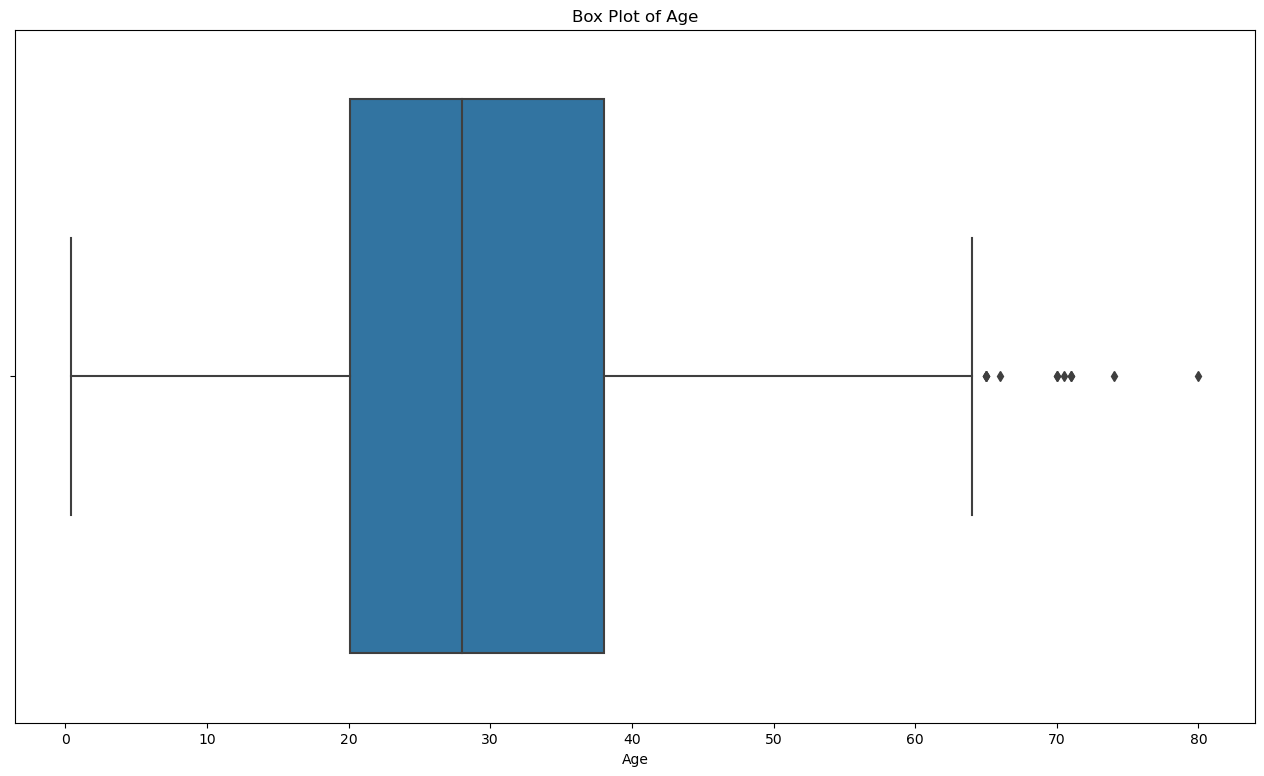

In [24]:
# Create a box plot to visualize outliers
plt.figure(figsize=(16, 9))
sns.boxplot(x=df["Age"])
plt.title("Box Plot of " + "Age")
plt.show()

In [25]:
# Alternate method
#Z-score Treatment to detect the outlier
# Calculate z-scores for the Age
z_scores = (df["Age"] - df["Age"].mean()) / df["Age"].std()

In [26]:
z_scores

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: Age, Length: 891, dtype: float64

In [27]:
#To Define a threshold for outliers (e.g., z-score greater than 3 or less than -3)
threshold = 3

In [28]:
outliers = df[abs(z_scores) > threshold]

In [29]:
print(outliers)

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
630  male  80.0      0      0   27042  30.000   A23        S  
851  male  74.0      0      0  347060   7.775   NaN        S  


### 9.Relationship between Pclass and Age

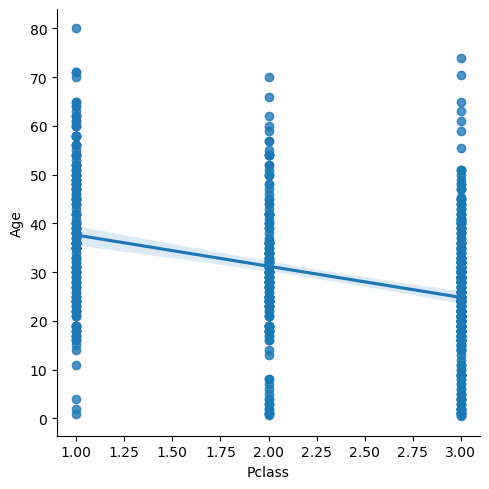

In [30]:
sns.lmplot(x="Pclass",y="Age",data=df)

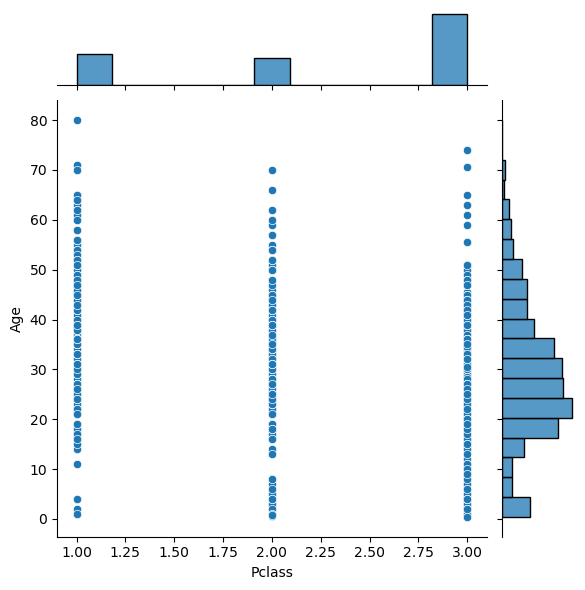

In [31]:
sns.jointplot(x="Pclass",y="Age",data=df)
plt.show()

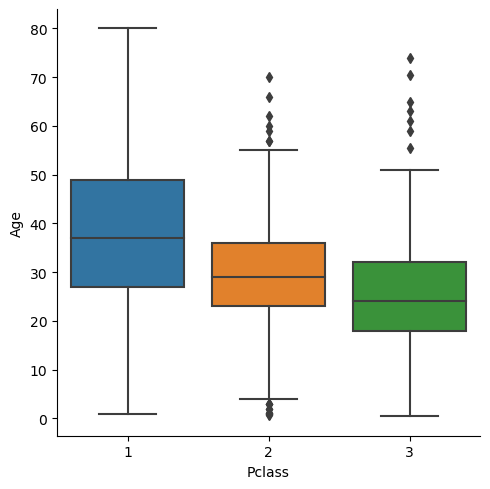

In [32]:
sns.catplot(x="Pclass",y="Age",kind="box",data=df)
plt.show()

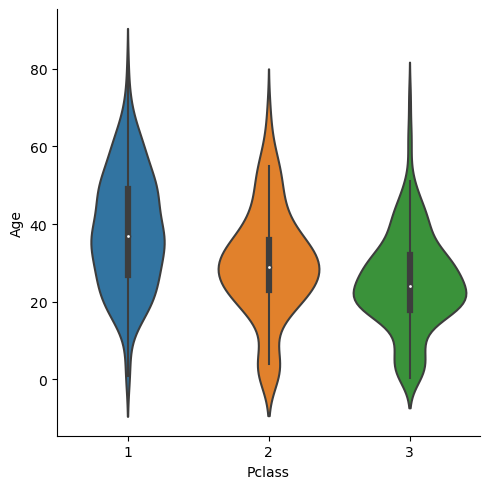

In [33]:
sns.catplot(x="Pclass",y="Age",kind="violin",data=df)
plt.show()

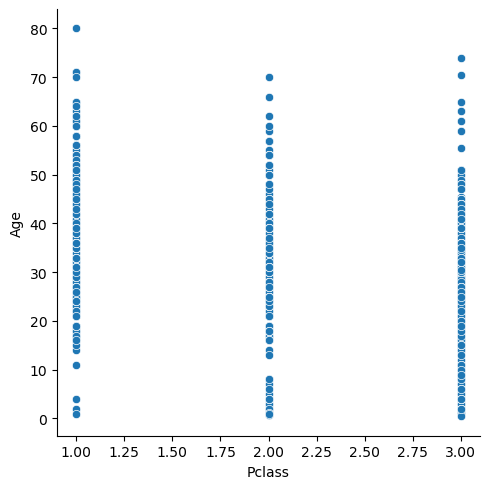

In [34]:
sns.relplot(x="Pclass",y="Age",data=df)
plt.show()

### 10.Pairplot for all the numerical attributes

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


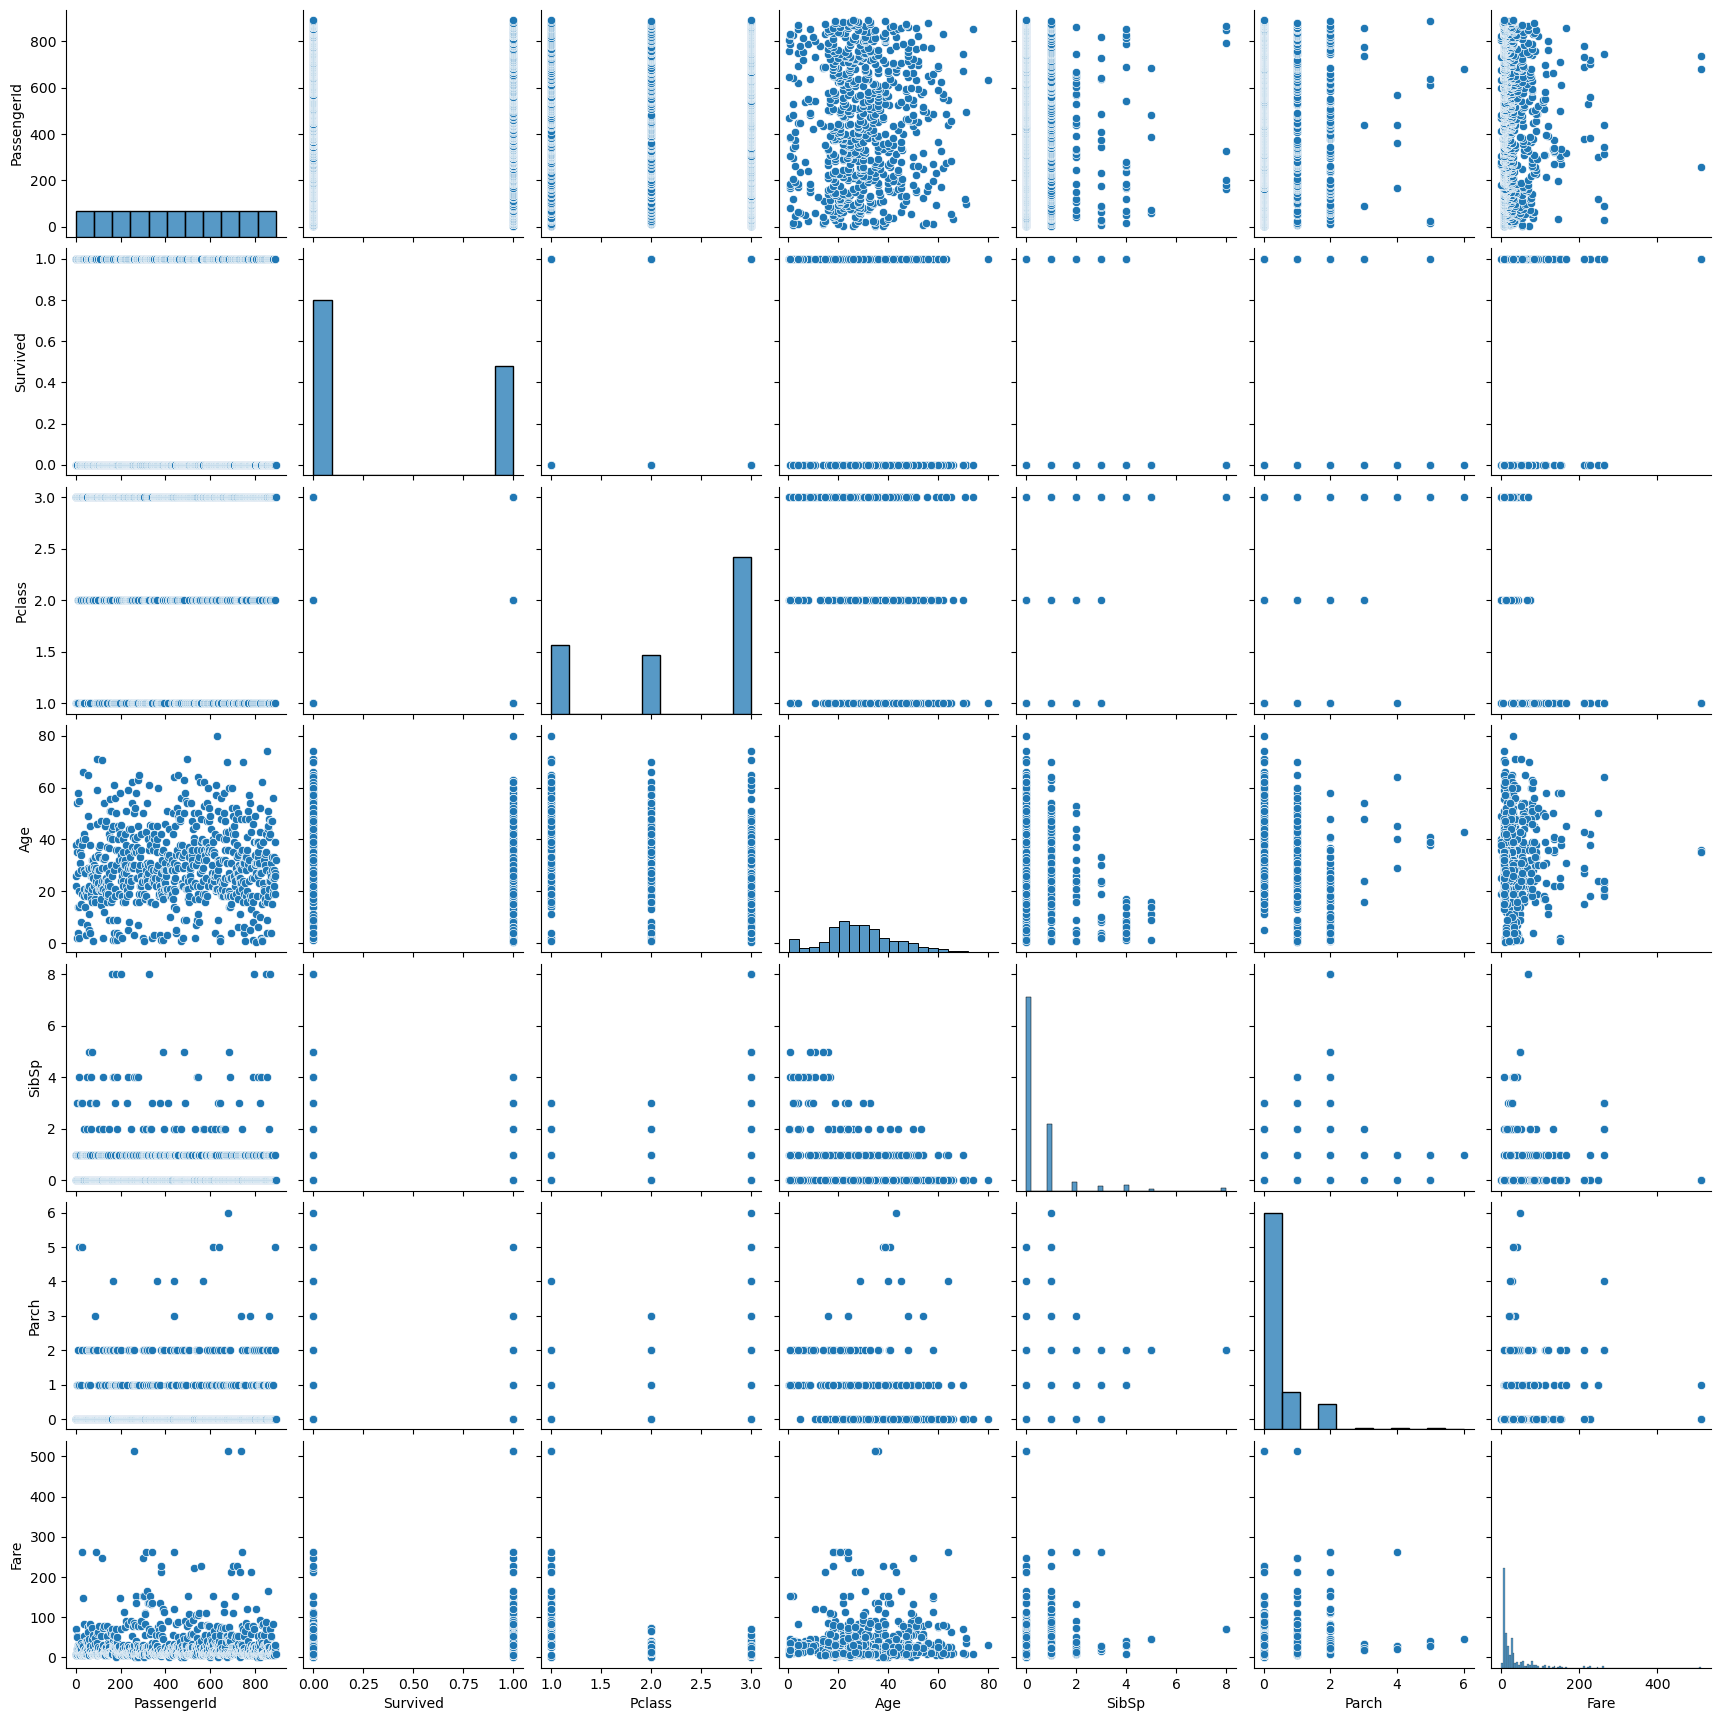

In [36]:
sns.pairplot(df)

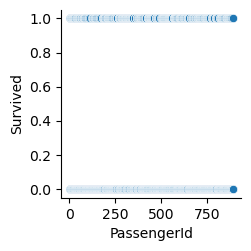

In [37]:
sns.pairplot(x_vars="PassengerId",y_vars="Survived",data=df)
plt.show()

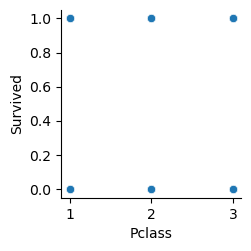

In [38]:
sns.pairplot(x_vars="Pclass",y_vars="Survived",data=df)
plt.show()

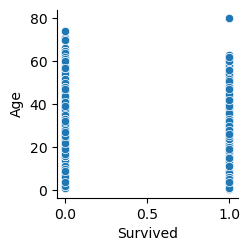

In [39]:
sns.pairplot(x_vars="Survived",y_vars="Age",data=df)
plt.show()

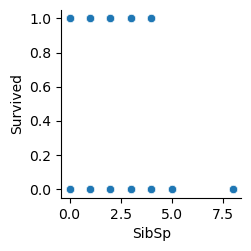

In [40]:
sns.pairplot(x_vars="SibSp",y_vars="Survived",data=df)
plt.show()

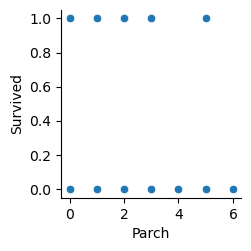

In [41]:
sns.pairplot(x_vars="Parch",y_vars="Survived",data=df)
plt.show()

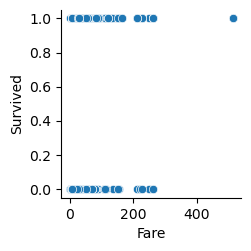

In [42]:
sns.pairplot(x_vars="Fare",y_vars="Survived",data=df)
plt.show()

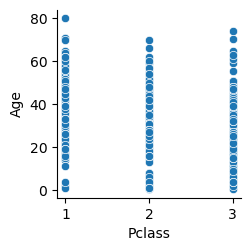

In [43]:
sns.pairplot(x_vars="Pclass",y_vars="Age",data=df)
plt.show()

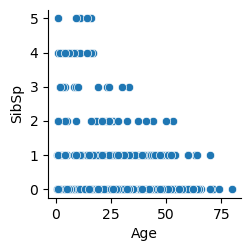

In [44]:
sns.pairplot(x_vars="Age",y_vars="SibSp",data=df)
plt.show()



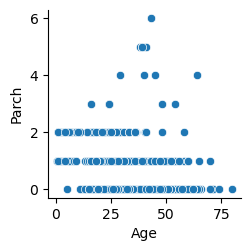

In [45]:
sns.pairplot(x_vars="Age",y_vars="Parch",data=df)
plt.show()

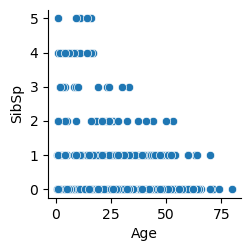

In [46]:
sns.pairplot(x_vars="Age",y_vars="SibSp",data=df)

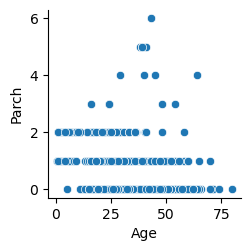

In [47]:
sns.pairplot(x_vars="Age",y_vars="Parch",data=df)

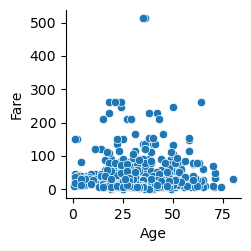

In [48]:
sns.pairplot(x_vars="Age",y_vars="Fare",data=df)

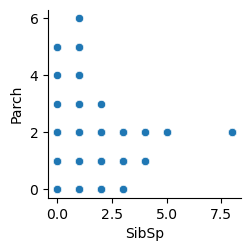

In [49]:
sns.pairplot(x_vars="SibSp",y_vars="Parch",data=df)


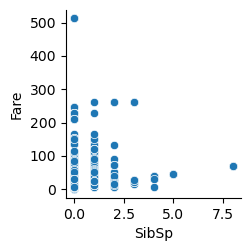

In [50]:
sns.pairplot(x_vars="SibSp",y_vars="Fare",data=df)

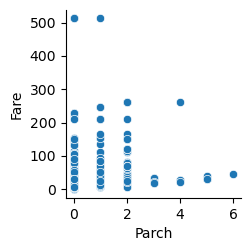

In [51]:
sns.pairplot(x_vars="Parch",y_vars="Fare",data=df)
